# Reto Cobify - PART 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading dataset

In [2]:
measurements = pd.read_csv("../data/measurements.csv")
measurements.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


# 2. Exploring

In [3]:
measurements.shape

(388, 12)

### Checking for null values

In [4]:
measurements.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

- There are quite a lot of null values which can complicate the process of analyzing data and drawing accurate conclusions, so let's take care of that

### Handling missing values

In [5]:
measurements['specials'].unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [6]:
measurements.drop(['refill liters', 'refill gas', 'specials'], axis=1, inplace=True)

In [7]:
measurements = measurements.dropna(axis=0, how ='any')

In [8]:
measurements.isnull().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

In [9]:
measurements.shape

(376, 9)

### Checking types

In [10]:
measurements.dtypes

distance        object
consume         object
speed            int64
temp_inside     object
temp_outside     int64
gas_type        object
AC               int64
rain             int64
sun              int64
dtype: object

- There are some variables that should be converted --> Eg: **distance** should be a `float` instead of an `object`

#### Converting *distance, consume, temp_inside* to `float`

Replacing commas with dots so it's easier to work with those numbers

In [11]:
measurements[['distance', 'consume', 'temp_inside']] = measurements[['distance', 'consume', 'temp_inside']].apply(lambda x: x.str.replace(',','.'))

In [12]:
measurements.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,21.5,12,E10,0,0,0
1,12,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


Converting to `floats`

In [13]:
measurements[['distance', 'consume', 'temp_inside']] = measurements[['distance', 'consume', 'temp_inside']].apply(pd.to_numeric)

In [14]:
measurements.dtypes

distance        float64
consume         float64
speed             int64
temp_inside     float64
temp_outside      int64
gas_type         object
AC                int64
rain              int64
sun               int64
dtype: object

# 3. Visualizing & Storytelling

#### Now that our data is clean and in order, let's visualize it from a general perspective and then find relationships between the variables

### Distance

In [15]:
measurements['distance'].value_counts(ascending=False)

11.8    36
12.3    23
16.0    23
12.4    17
15.4    14
        ..
6.4      1
17.9     1
11.7     1
10.2     1
28.0     1
Name: distance, Length: 169, dtype: int64

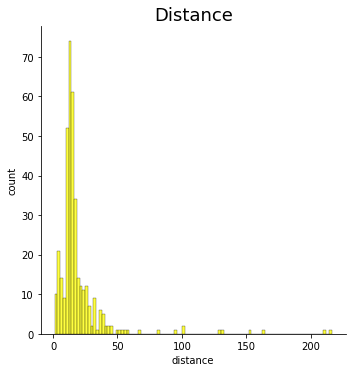

In [16]:
sns.displot(measurements['distance'], kde=False, color='yellow', bins=100);
plt.title('Distance', fontsize=18)
plt.xlabel('distance', fontsize=10)
plt.ylabel('count', fontsize=10);

**Key Takeaway**:
- Normal distribution skewed to the left (positively skewed)
- Most of the distance that the cars have achieved to do is between 0 and 30 km, which can mean that the cars don't go too far away from their origin point, either because they are not in a good condition to do long journeys or because the trips from the clients are short

### Consume

In [17]:
measurements['consume'].value_counts(ascending=False).head()

4.5    27
5.0    26
4.6    22
4.7    20
4.3    20
Name: consume, dtype: int64

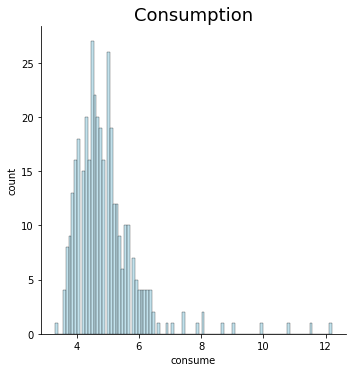

In [18]:
sns.displot(measurements['consume'], kde=False, color='lightblue', bins=100);
plt.title('Consumption', fontsize=18)
plt.xlabel('consume', fontsize=10)
plt.ylabel('count', fontsize=10);

**Key Takeaway**:
- Normal distribution skewed to the left (positively skewed), with two peaks (bimodal distribution)
- Cars tend to consume rather less fuel

### Speed

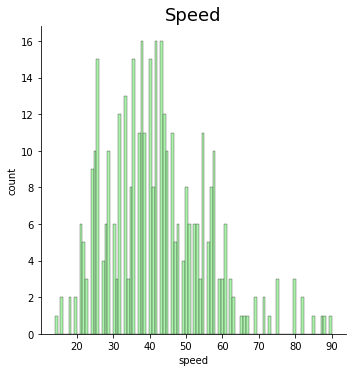

In [19]:
sns.displot(measurements['speed'], kde=False, color='lightgreen', bins=100);
plt.title('Speed', fontsize=18)
plt.xlabel('speed', fontsize=10)
plt.ylabel('count', fontsize=10);

In [20]:
measurements['speed'].mean()

41.95744680851064

**Key Takeaway**:
- Normal distribution that tends towards a symmetrical distribution, even though it is imperfect and has many peaks
- Speeds are very varied and the mean is around 42 km/hr

### Temp_inside

In [21]:
measurements['temp_inside'].value_counts(ascending=False)

21.5    133
22.0    102
22.5     59
20.0     25
23.0     13
21.0     13
25.0     12
24.5      7
20.5      4
24.0      3
25.5      2
23.5      2
19.0      1
Name: temp_inside, dtype: int64

In [22]:
measurements['temp_inside'].mean()

21.929521276595743

In [23]:
measurements['temp_inside'].max()

25.5

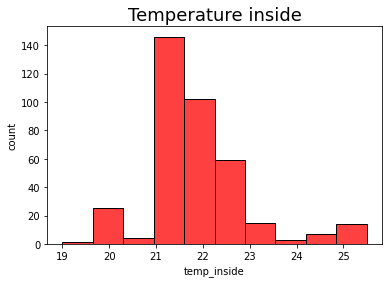

In [24]:
sns.histplot(measurements['temp_inside'], kde=False, color='red', bins=10);
plt.title('Temperature inside', fontsize=18)
plt.xlabel('temp_inside', fontsize=10)
plt.ylabel('count', fontsize=10);

**Key Takeaway**:
- We can see that the highest temperature reached inside the car is 25º, whereas, the average temperature is around 21-22º

### Temp Outside

In [25]:
measurements['temp_outside'].mean()

11.340425531914894

In [26]:
measurements['temp_outside'].max()

31

In [27]:
measurements['temp_outside'].min()

-5

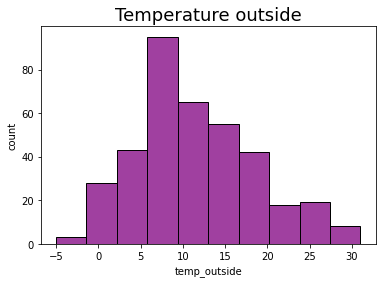

In [28]:
sns.histplot(measurements['temp_outside'], kde=False, color='purple', bins=10);
plt.title('Temperature outside', fontsize=18)
plt.xlabel('temp_outside', fontsize=10)
plt.ylabel('count', fontsize=10);

**Key Takeaway:**
- We can see from the graph that the temperature outside the car covers a wider spectrum of temperatures compared to the temperatures inside the car, ranging from -5 to 31º

### Gas Type

In [29]:
measurements['gas_type'].value_counts(ascending=False).head()

SP98    219
E10     157
Name: gas_type, dtype: int64

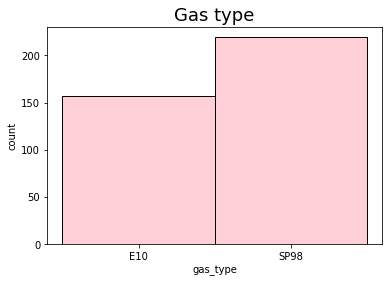

In [31]:
sns.histplot(measurements['gas_type'], kde=False, color='pink', bins=10);
plt.title('Gas type', fontsize=18)
plt.xlabel('gas_type', fontsize=10)
plt.ylabel('count', fontsize=10);

**Key Takeaway:**
- There are significantly more cars that use SP98 fuel than E10
- Let's figure out if cars using one type of fuel instead of the other has an impact on the rest of the variables 

# Visualizing relationship between variables

### Distance - Consume

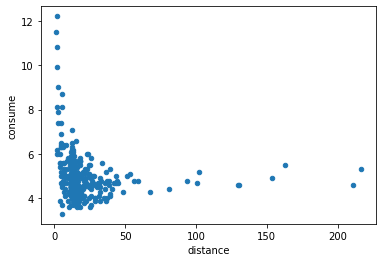

In [44]:
measurements.plot.scatter(x='distance', y='consume');

**Key Takeaway:**
- The lower the distance, the higher the consume. For instance, car that didn't drive much (between 0-50km), are consuming up to 12 units of fuel

### Distance - Gas Type

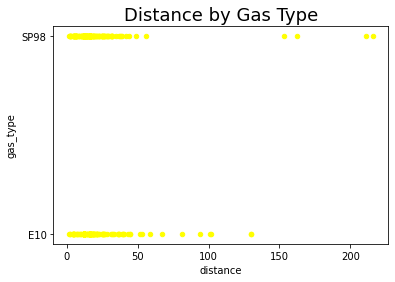

In [54]:
measurements.plot.scatter(x='distance', y='gas_type', color='yellow');
plt.title('Distance by Gas Type', fontsize=18)
plt.xlabel('distance', fontsize=10)
plt.ylabel('gas_type', fontsize=10);

**Key Takeaway:**
- Cars using SP98 can do longer journeys, compared to those that use E10

### Consume - Gas Type

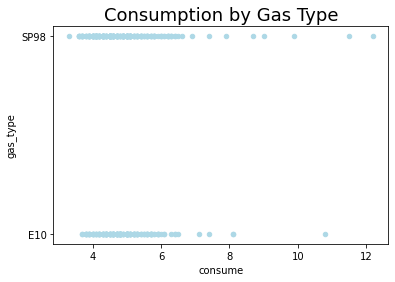

In [55]:
measurements.plot.scatter(x='consume', y='gas_type', color='lightblue');
plt.title('Consumption by Gas Type', fontsize=18)
plt.xlabel('consume', fontsize=10)
plt.ylabel('gas_type', fontsize=10);

**Key Takeaway:**
- SP98 consumes more than E10

### Speed - Gas Type

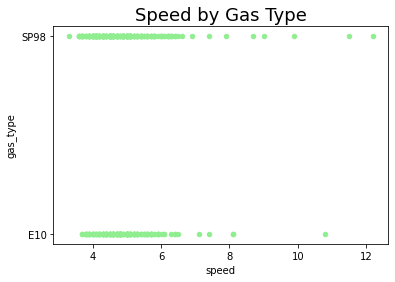

In [56]:
measurements.plot.scatter(x='consume', y='gas_type', color='lightgreen');
plt.title('Speed by Gas Type', fontsize=18)
plt.xlabel('speed', fontsize=10)
plt.ylabel('gas_type', fontsize=10);

**Key Takeaway:**
- SP98 allows cars to go faster than E10

## Correlation

In [32]:
matrix = measurements.corr()
matrix

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
distance,1.000000,-0.131379,0.565505,0.075305,0.086774,-0.027670,-0.022129,0.078627
consume,-0.131379,1.000000,-0.234537,-0.161991,-0.318758,0.093892,0.247699,-0.169173
speed,0.565505,-0.234537,1.000000,0.059725,0.019327,-0.036351,-0.002936,0.077181
temp_inside,0.075305,-0.161991,0.059725,1.000000,0.361308,0.297775,-0.037356,0.246120
temp_outside,0.086774,-0.318758,0.019327,0.361308,1.000000,0.169374,-0.185731,0.349988
AC,-0.027670,0.093892,-0.036351,0.297775,0.169374,1.000000,0.244848,0.090164
rain,-0.022129,0.247699,-0.002936,-0.037356,-0.185731,0.244848,1.000000,-0.113298
sun,0.078627,-0.169173,0.077181,0.246120,0.349988,0.090164,-0.113298,1.000000


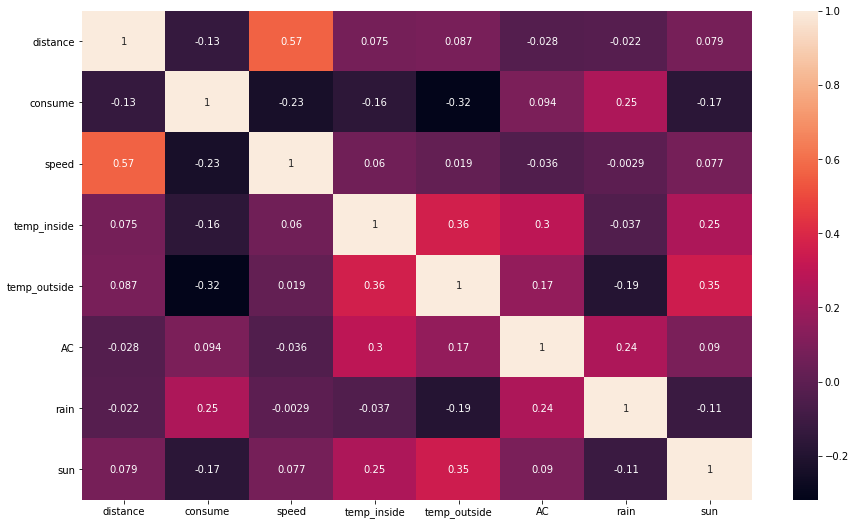

In [33]:
plt.figure(figsize=(15,9))
sns.heatmap(matrix, annot=True);

- There are no variables with a high correlation that we should worry about, so let's export the clean dataset and start modeling

### Converting *gas_type* to dummy

In [35]:
measurements_dummy = pd.get_dummies(measurements)

In [36]:
measurements_dummy.head()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_E10,gas_type_SP98
0,28.0,5.0,26,21.5,12,0,0,0,1,0
1,12.0,4.2,30,21.5,13,0,0,0,1,0
2,11.2,5.5,38,21.5,15,0,0,0,1,0
3,12.9,3.9,36,21.5,14,0,0,0,1,0
4,18.5,4.5,46,21.5,15,0,0,0,1,0


# Exporting dataset

Choosing 80% for the train dataset

In [37]:
train_dummy = measurements_dummy.sample(frac=0.8)
train_dummy.head()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_E10,gas_type_SP98
47,16.0,4.9,25,21.5,8,0,0,0,0,1
94,11.8,5.9,21,20.0,9,1,1,0,0,1
212,13.4,5.5,31,20.0,9,0,0,0,0,1
360,6.0,4.8,27,22.0,17,0,0,0,0,1
185,51.6,5.0,73,22.5,12,0,0,0,1,0


In [38]:
train_dummy.to_csv("../data/train_dummy.csv")

Choosing 20% for the test dataset

In [39]:
test_dummy = measurements_dummy.sample(frac=0.2)
test_dummy.head()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_E10,gas_type_SP98
212,13.4,5.5,31,20.0,9,0,0,0,0,1
260,25.7,5.0,45,22.5,7,0,0,0,1,0
18,25.9,4.9,39,21.5,8,0,0,0,1,0
141,12.3,5.4,58,21.5,13,0,0,0,1,0
375,11.9,3.7,33,25.0,19,0,0,0,0,1


In [40]:
test_dummy.to_csv("../data/test_dummy.csv")